In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
RSEED = 8 
# to filter out warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("/content/aps_failure_training_set.csv", on_bad_lines='skip')
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
data.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [4]:
data.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [6]:
data.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [7]:
data.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [8]:
(data == "na").sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [9]:
data['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [10]:
#data.columns.value_counts()
#list(data.columns.values.tolist())

In [11]:
listColumn = ['class']

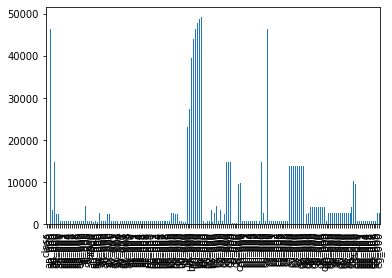

In [12]:
data.columns
series = (data == "na").sum(axis=0)
series.plot.bar(stacked = True)

#sns.histplot(data=series, x="flipper_length_mm")

In [13]:
def drop_missing_values(df, miss):

       
    
    df = pd.DataFrame(df, columns = df.columns) 
    df5 = df.replace(miss, np.NAN)
    data_dropped =  df5.dropna(axis = 0)

    

    return data_dropped

In [14]:
data_dropped = drop_missing_values(data, "na")

In [15]:
data_dropped.describe()

,aa_000
count,5.910000e+02
mean,2.809300e+05
std,2.242716e+05
min,0.000000e+00
25%,1.577120e+05
50%,1.952680e+05
75%,3.037300e+05
max,1.675586e+06


In [16]:
data_dropped.shape

(591, 171)

In [17]:
data_dropped

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,neg,31300,0,784,740,0,0,0,0,0,...,798872,112724,51736,7054,6628,27600,2,2,0,0
179,neg,97000,0,378,160,0,0,0,0,0,...,1078982,313334,511330,552328,871528,871104,1980,42,0,0
225,neg,124656,2,278,170,0,0,0,0,0,...,1205696,866148,697610,700400,1900386,437532,3680,0,0,0
394,pos,281324,2,3762,2346,0,0,4808,215720,967572,...,624606,269976,638838,1358354,819918,262804,2824,0,0,0
413,pos,43482,0,1534,1388,0,0,0,0,40024,...,497196,121166,202272,232636,645690,50,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,neg,118028,0,740,714,618,690,0,0,0,...,838952,631338,541036,1285274,1832658,165838,3022,0,0,0
59562,neg,229916,0,616,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59843,neg,224084,0,912,766,0,0,0,0,0,...,413576,209524,469894,2233992,5933084,364450,12422,0,0,0
59870,neg,197332,0,658,616,216,346,0,0,0,...,73940,49896,90454,575264,104600,10352,36,0,0,0


In [18]:
# X = pd.DataFrame(data = data_dropped.drop(labels="class", axis = 1))


# y = pd.Series(data= data_dropped.iloc[1,:] ) 


In [19]:
print(data_dropped.groupby('class').size())

class
neg    515
pos     76
dtype: int64


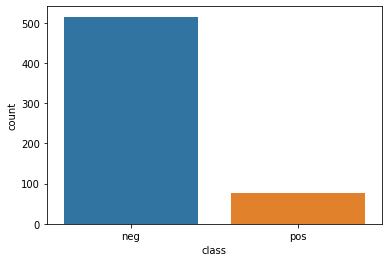

In [20]:
import seaborn as sns

sns.countplot(data_dropped['class'],label="Count")

In [21]:
data_dropped.info

<bound method DataFrame.info of       class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000  ag_001  ag_002  \
16      neg   31300      0    784    740      0      0      0       0       0   
179     neg   97000      0    378    160      0      0      0       0       0   
225     neg  124656      2    278    170      0      0      0       0       0   
394     pos  281324      2   3762   2346      0      0   4808  215720  967572   
413     pos   43482      0   1534   1388      0      0      0       0   40024   
...     ...     ...    ...    ...    ...    ...    ...    ...     ...     ...   
59432   neg  118028      0    740    714    618    690      0       0       0   
59562   neg  229916      0    616      0      0      0      0       0       0   
59843   neg  224084      0    912    766      0      0      0       0       0   
59870   neg  197332      0    658    616    216    346      0       0       0   
59950   neg   76812      0    376    340      0      0      0       0    5744

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
def encodeColumn(parameter):
    data_dropped[parameter] = encoder.fit_transform(data_dropped[parameter])

In [24]:
listColumn = ['class']

In [25]:
for i in listColumn:
    encodeColumn(i)
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 16 to 59950
Columns: 171 entries, class to eg_000
dtypes: int64(2), object(169)
memory usage: 810.3+ KB


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_dropped.loc[:, data_dropped.columns != 'class'], data_dropped['class'], stratify=data_dropped['class'], random_state=66)

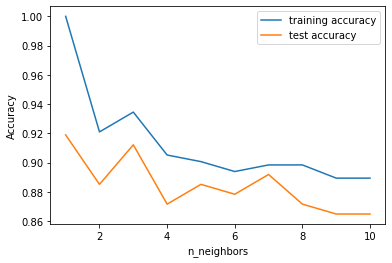

In [27]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('K-NN classifier Accuracy on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('K-NN classifier Accuracy  on test set: {:.2f}'.format(knn.score(X_test, y_test)))

K-NN classifier Accuracy on training set: 0.93
K-NN classifier Accuracy  on test set: 0.91


In [29]:
def confusionmatrix(y_test,y_predict,x='name of model'):
    cm=metrics.confusion_matrix(y_test,y_predict)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,annot=True,cbar=False, fmt='g')
    cm1 = pd.DataFrame(cm.reshape((1,4)), columns=['TN', 'FP', 'FN', 'TP'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(x)
    TC= 10*cm1.FP + 500*cm1.FN   
    return [ plt.show(),print(cm1),print(TC)]

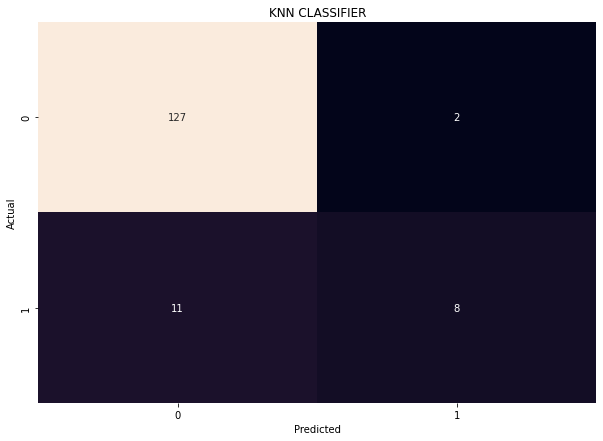

    TN  FP  FN  TP
0  127   2  11   8
0    5520
dtype: int64


[None, None, None]

In [30]:
confusionmatrix(y_test,knn.predict(X_test),x='KNN CLASSIFIER')

In [31]:

#Using Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score for LR: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score for LR: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score for LR: 0.971
Test set score for LR: 0.946


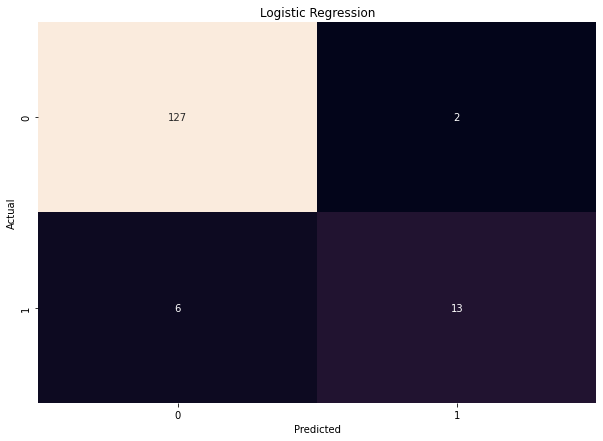

    TN  FP  FN  TP
0  127   2   6  13
0    3020
dtype: int64


[None, None, None]

In [32]:
confusionmatrix(y_test,logreg.predict(X_test),x='Logistic Regression')

In [33]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score for LR with C as 100: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score for LR with C as 100: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score for LR with C as 100: 0.980
Test set score for LR with C as 100: 0.959


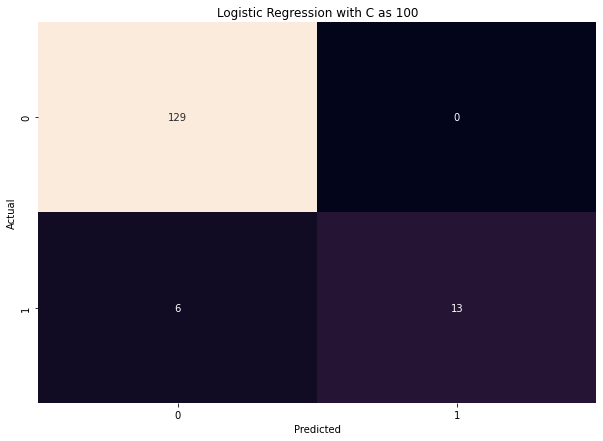

    TN  FP  FN  TP
0  129   0   6  13
0    3000
dtype: int64


[None, None, None]

In [34]:
confusionmatrix(y_test,logreg100.predict(X_test),x='Logistic Regression with C as 100')

In [35]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score for LR with C as 0.01: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score for LR with C as 0.01: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score for LR with C as 0.01: 0.973
Test set score for LR with C as 0.01: 0.946


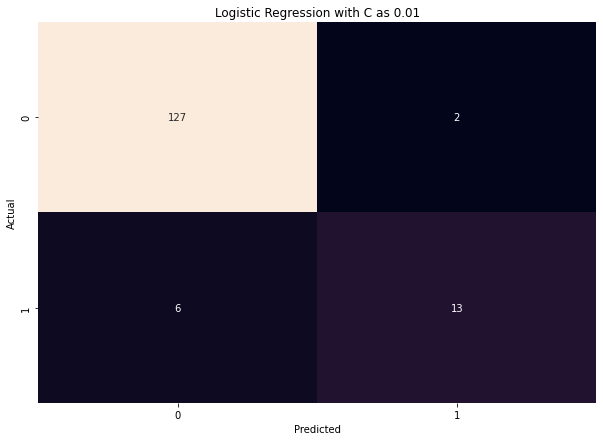

    TN  FP  FN  TP
0  127   2   6  13
0    3020
dtype: int64


[None, None, None]

In [36]:
confusionmatrix(y_test,logreg001.predict(X_test),x='Logistic Regression with C as 0.01')

In [37]:
#data_dropped.info

In [38]:
# data_features = [x for i,x in enumerate(data_dropped.columns) if i!=0]

# plt.figure(figsize=(8,6))
# plt.plot(logreg.coef_.T, 'o', label="C=1")
# plt.plot(logreg100.coef_.T, '^', label="C=100")
# plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
# plt.xticks(range(data_dropped.shape[1]), data_features, rotation=0)
# plt.hlines(0, 0, data_dropped.shape[1])
# plt.ylim(-10, 10)
# plt.xlabel("Feature")
# plt.ylabel("Coefficient magnitude")
# plt.legend()
# plt.savefig('log_coef')

In [39]:
#from sklearn.metrics import confusion_matrix
#cf_matrix=confusion_matrix(y_test,logreg.predict(X_test))#,x='Logistic regression')
#confusionmatrix(y_test,logreg.predict(X_test),x='Logistic regression')

In [40]:
# import seaborn as sns
# #sns.heatmap(cf_matrix, annot=True)
# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%', cmap='Blues')

In [41]:
#data_dropped.shape[0]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set for Decision Tree without Max Depth: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on training set for Decision Tree without Max Depth: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set for Decision Tree without Max Depth: 1.000
Accuracy on training set for Decision Tree without Max Depth: 0.932


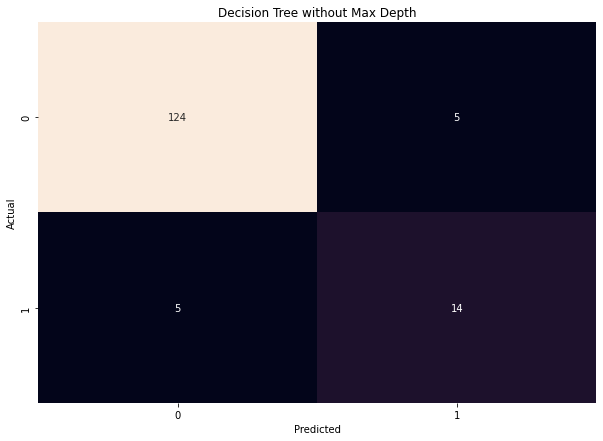

    TN  FP  FN  TP
0  124   5   5  14
0    2550
dtype: int64


[None, None, None]

In [43]:
confusionmatrix(y_test,tree.predict(X_test),x='Decision Tree without Max Depth')

In [44]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set for Decision Tree with Max Depth: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set for Decision Tree with Max Depth: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set for Decision Tree with Max Depth: 0.980
Accuracy on test set for Decision Tree with Max Depth: 0.959


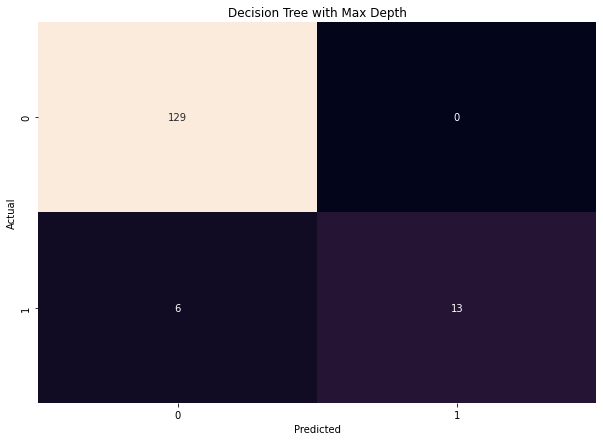

    TN  FP  FN  TP
0  129   0   6  13
0    3000
dtype: int64


[None, None, None]

In [45]:
confusionmatrix(y_test,tree.predict(X_test),x='Decision Tree with Max Depth')

In [46]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.032734   0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.06845069 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03154929 0.         0.         0.13130106
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.5252816  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.08897885 0.         0.
 0.         0.         0.         0.         0.         0.05779607
 0.         0.     

In [47]:
# def plot_feature_importances_data(model):
#     plt.figure(figsize=(8,6))
#     n_features = 170
#     plt.barh(range(n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), data_features)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
#     plt.ylim(-1, n_features)

# plot_feature_importances_data(tree)
# plt.savefig('feature_importance')

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy on training set for Random Forest: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set for Random Forest: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set for Random Forest: 1.000
Accuracy on test set for Random Forest: 0.973


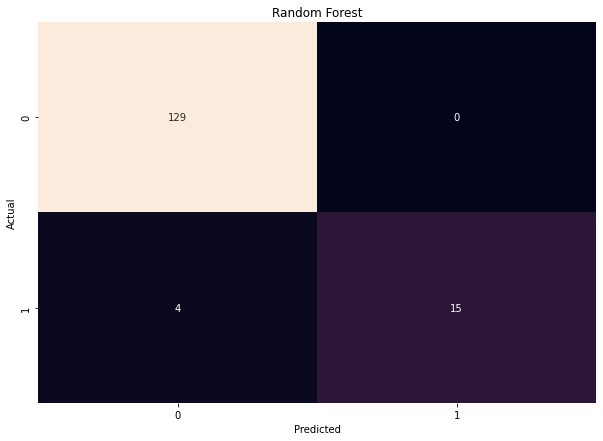

    TN  FP  FN  TP
0  129   0   4  15
0    2000
dtype: int64


[None, None, None]

In [49]:
confusionmatrix(y_test,rf.predict(X_test),x='Random Forest')

In [50]:
# plot_feature_importances_data(rf)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set for Gradient Boosting without Max Depth and Learning Rate: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set for Gradient Boosting without Max Depth and Learning Rate: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set for Gradient Boosting without Max Depth and Learning Rate: 1.000
Accuracy on test set for Gradient Boosting without Max Depth and Learning Rate: 0.953


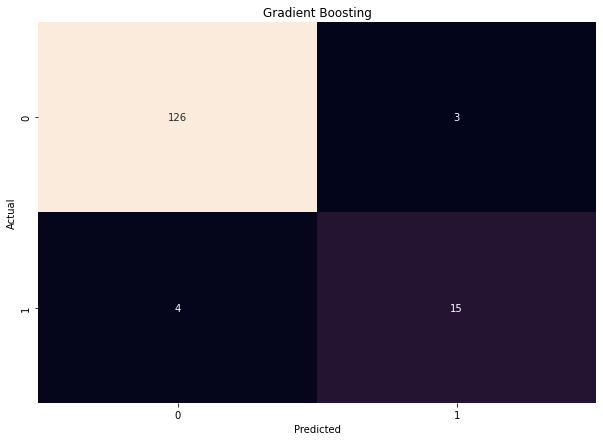

    TN  FP  FN  TP
0  126   3   4  15
0    2030
dtype: int64


[None, None, None]

In [52]:
confusionmatrix(y_test,gb.predict(X_test),x='Gradient Boosting')

In [53]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set for Gradient Boosting with Max Depth: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set for Gradient Boosting with Max Depth: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set for Gradient Boosting with Max Depth: 0.986
Accuracy on test set for Gradient Boosting with Max Depth: 0.939


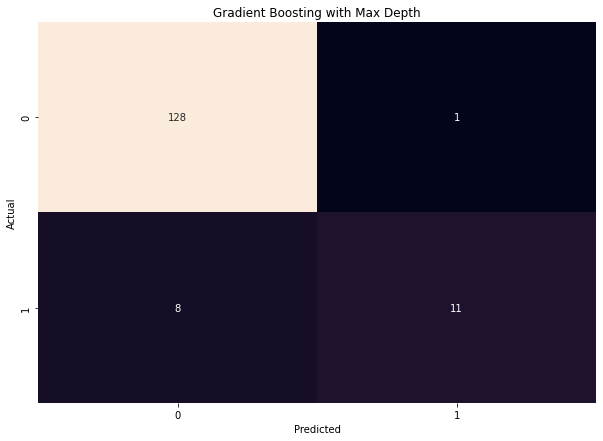

    TN  FP  FN  TP
0  128   1   8  11
0    4010
dtype: int64


[None, None, None]

In [54]:
confusionmatrix(y_test,gb1.predict(X_test),x='Gradient Boosting with Max Depth')

In [55]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

print("Accuracy on training set for Gradient Boosting with Learning Rate: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set for Gradient Boosting with Learning Rate: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set for Gradient Boosting with Learning Rate: 0.980
Accuracy on test set for Gradient Boosting with Learning Rate: 0.939


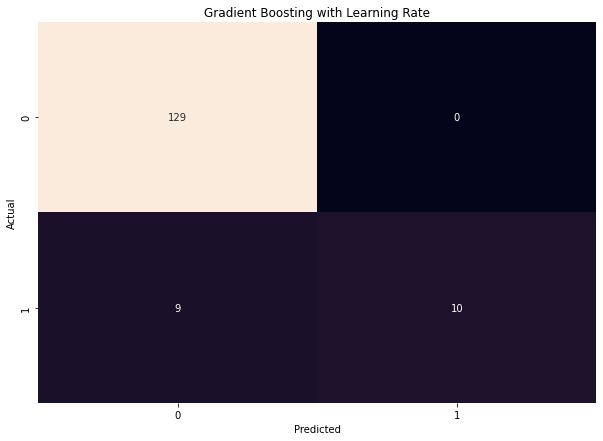

    TN  FP  FN  TP
0  129   0   9  10
0    4500
dtype: int64


[None, None, None]

In [56]:
confusionmatrix(y_test,gb2.predict(X_test),x='Gradient Boosting with Learning Rate')

In [57]:
# gb = GradientBoostingClassifier(random_state=0, max_depth=1)
# gb.fit(X_train, y_train)

# plot_feature_importances_data(gb1)

In [58]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set for SVC: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set for SVC: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set for SVC: 0.87
Accuracy on test set for SVC: 0.87


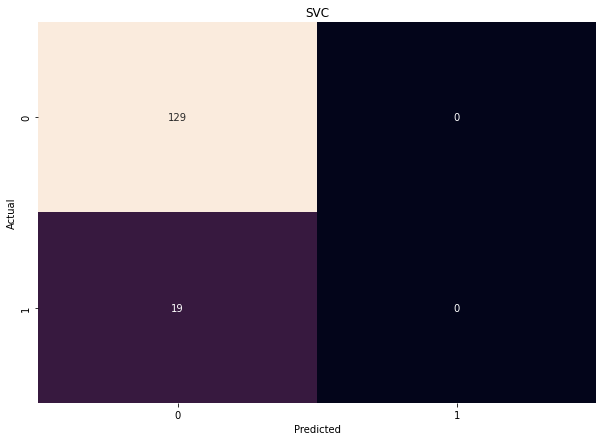

    TN  FP  FN  TP
0  129   0  19   0
0    9500
dtype: int64


[None, None, None]

In [59]:
confusionmatrix(y_test,svc.predict(X_test),x='SVC')

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc1 = SVC()
svc1.fit(X_train_scaled, y_train)

print("Accuracy on training set for SVC with Scaling: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set for SVC with Scaling: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set for SVC with Scaling: 0.87
Accuracy on test set for SVC with Scaling: 0.87


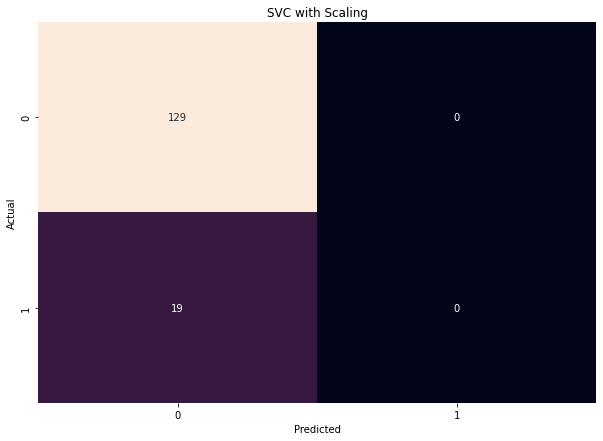

    TN  FP  FN  TP
0  129   0  19   0
0    9500
dtype: int64


[None, None, None]

In [61]:
confusionmatrix(y_test,svc1.predict(X_test),x='SVC with Scaling')

In [62]:
svc2 = SVC(C=1000)
svc2.fit(X_train_scaled, y_train)

print("Accuracy on training set for SVC with Scaling and C=1000: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set for SVC with Scaling and C=1000: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set for SVC with Scaling and C=1000: 0.871
Accuracy on test set for SVC with Scaling and C=1000: 0.872


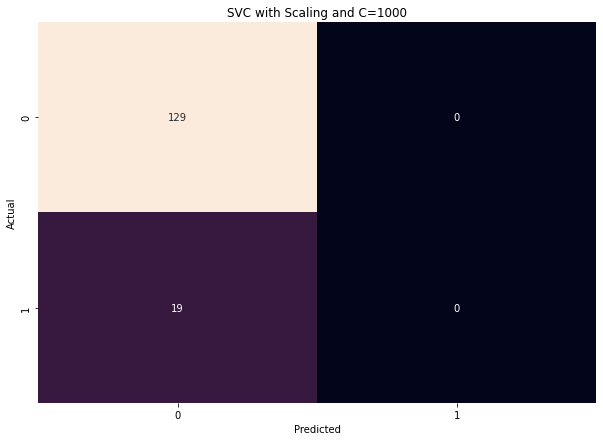

    TN  FP  FN  TP
0  129   0  19   0
0    9500
dtype: int64


[None, None, None]

In [63]:
confusionmatrix(y_test,svc2.predict(X_test),x='SVC with Scaling and C=1000')

In [64]:
#Using Kmeans to find the clusters

data_1 = data_dropped.drop(['class'],axis=1)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_1)
data_standardized = pd.DataFrame(data_standardized,columns=data_1.columns)

In [65]:
def elbow_method(X, max_range_for_elbow, rseed = RSEED):

    inertia_values = []
    for k in range(1,max_range_for_elbow):
        km = KMeans(n_clusters=k, random_state=RSEED)
        km = km.fit(X)
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1,max_range_for_elbow), inertia_values)
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('Inertia', fontsize=15)
    plt.title('Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

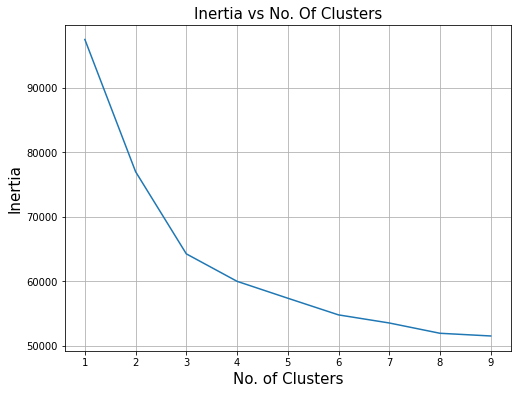

In [66]:
elbow_method(data_standardized,10)

<function matplotlib.pyplot.show(*args, **kw)>

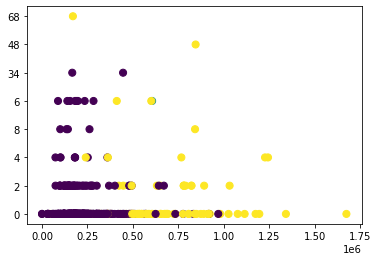

In [67]:
kmeans = KMeans(n_clusters=3, random_state = RSEED)
kmeans_labels = kmeans.fit_predict(data_standardized)
plt.scatter(data_1.iloc[:,0] , data_1.iloc[:,1] , c = kmeans_labels, s=50) 
plt.show

In [68]:
#data_1.iloc[:,0]
data_1.iloc[:,1] 

16       0
179      0
225      2
394      2
413      0
        ..
59432    0
59562    0
59843    0
59870    0
59950    0
Name: ab_000, Length: 591, dtype: object

In [69]:
pca = PCA(n_components=2).fit(data_1)
pca_2d = pca.transform(data_1)

Text(0.5, 1.0, 'Kmeans')

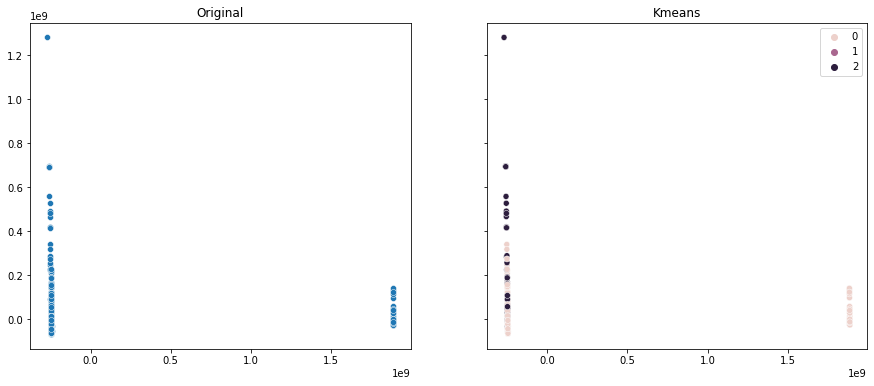

In [70]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 6))


sns.scatterplot(x=pca_2d[:, 0],y=pca_2d[:, 1], ax=axes[0])
axes[0].set_title("Original" )

sns.scatterplot(x=pca_2d[:, 0],y=pca_2d[:, 1],hue=kmeans_labels, ax=axes[1])
axes[1].set_title("Kmeans")

In [71]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set for the Neural Network with Random state: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set for the Neural Network with Random state: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set for the Neural Network with Random state: 0.97
Accuracy on test set for the Neural Network with Random state: 0.97


In [72]:
#confusionmatrix(y_test,mlp.predict(X_test),x='Multi Layer Perceptron')

In [73]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set for the Neural Network with scaled records: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set for the Neural Network with scaled records: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


input = X_train_scaled.shape[1]

Accuracy on training set for the Neural Network with scaled records: 0.989
Accuracy on test set for the Neural Network with scaled records: 0.953


In [74]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train, y_train)

print("Accuracy on training set for the Neural Network with Max iterations: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set for the Neural Network with Max iterations: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set for the Neural Network with Max iterations: 0.953
Accuracy on test set for the Neural Network with Max iterations: 0.953


In [75]:
#!python -m pip install "git+https://github.com/javadba/mpld3@display_fix"
#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# plt.figure(figsize=(20, 5))
# plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
# plt.yticks(range(170), data_features)
# plt.xlabel("Columns in weight matrix")
# plt.ylabel("Input feature")
# plt.colorbar()


In [76]:
# #!python -m pip install "git+https://github.com/javadba/mpld3@display_fix"
# import mpld3
# mpld3.enable_notebook()
# plt.figure(figsize=(10, 15))
# plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
# # plt.yticks(range(170), data_features)
# # plt.xlabel("Columns in weight matrix")
# # plt.ylabel("Input feature")
# # plt.colorbar()

# plt.plot(range(170),data_features)
# plt.show()


In [77]:
import tensorflow as tf

from tensorflow.keras import layers, models
from keras.layers import Dropout
from tensorflow import keras

In [78]:
mlp = models.Sequential([
    layers.Dense(1, activation='relu', input_shape = (input, )),
    #Dropout(0.3),
    # layers.Dense(500, activation='relu', input_shape = (input, )),
    # Dropout(0.3),
    # layers.Dense(256, activation='relu'),
    # Dropout(0.3),
    # layers.Dense(256, activation='relu'),
    # Dropout(0.3),
    # layers.Dense(8, activation='relu'),
    # Dropout(0.3),
    # layers.Dense(1, activation='sigmoid'),
])

In [79]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 171       
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [80]:
mlp.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [81]:
#y_test

In [82]:
model_history = mlp.fit(X_train_scaled, y_train, epochs=100,
                        batch_size = 50,
                       validation_data=(X_test_scaled, y_test))

Epoch 1/100
9/9 [==============================] - 1s 30ms/step - loss: 1.2872 - accuracy: 0.8646 - val_loss: 0.7840 - val_accuracy: 0.8581
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.8821 - accuracy: 0.8623 - val_loss: 0.8235 - val_accuracy: 0.8514
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7540 - accuracy: 0.8510 - val_loss: 0.7457 - val_accuracy: 0.8716
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5772 - accuracy: 0.8510 - val_loss: 0.7495 - val_accuracy: 0.8581
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5127 - accuracy: 0.8533 - val_loss: 0.7431 - val_accuracy: 0.8649
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4261 - accuracy: 0.8555 - val_loss: 0.7305 - val_accuracy: 0.8716
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.4136 - accuracy: 0.8555 - val_loss: 0.7152 - val_accuracy: 0.8784
Epoch 8/100
9/9 [=========

In [83]:
#from imblearn.over_sampling import SMOTE

In [84]:
# from imblearn.over_sampling import SMOTE
# # sm = SMOTE()
# # x_train_new, y_train_new = sm.fit_resample(X_train, y_train)
# # x_train_scaled_new, y_train_scaled_new = sm.fit_resample(X_train_scaled, y_train)

# sm = SMOTE()
# x_train_new, y_train_new = sm.fit_resample(X_train, y_train)
# x_train_scaled_new, y_train_scaled_new = sm.fit_resample(X_train_scaled, y_train)

In [85]:
#y_train_new.value_counts()
# sns.countplot(y_train_new,label="Count")

In [86]:
# test_data = pd.read_csv("/content/aps_failure_test_set.csv", on_bad_lines='skip')
# test_data.head()

In [87]:
#test_data.tail()

In [88]:
#test_data.describe()

In [89]:
#test_data.isna().sum()

In [90]:
#test_data['class'].value_counts()

In [91]:
#print(test_data.groupby('class').size())

In [92]:
# import seaborn as sns

# sns.countplot(test_data['class'],label="Count")

In [93]:
# X_test = test_data.drop(columns="class", axis = 1)
# Y_test = test_data['class']

In [94]:
#X_test

In [95]:
#Y_test

In [96]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

In [97]:
#(test_data == "?").sum()

In [98]:
# def drop_missing_values(df, miss):

       
    
#     df = pd.DataFrame(df, columns = df.columns) 
#     df5 = df.replace(miss, np.NAN)
#     data_dropped =  df5.dropna(axis = 0)

    

#     return data_dropped

In [99]:
#test_data_dropped = drop_missing_values(test_data, "na")

In [100]:
#test_data_dropped

In [101]:
#test_data_dropped['class'].value_counts()


In [102]:
#confusion_matrix(y_test,logreg.predict(X_test),x='Logistic regression')